In [1]:
# 3.3.1_find_multiple_IRR_using_root_function.ipynb
""" 3.3.1 Find possible multiple IRRs """
import numpy as np
import numpy_financial as npf
from scipy.optimize import root
import matplotlib.pyplot as plt

In [2]:
# The cash flows
CF = [500, -1000, 0, 250, 250, 250]

# The function whose root we wish to find:
NPV = lambda r: npf.npv(r, CF)

In [3]:
# Find the root by iterating over several guesses and save in a list
guesses = np.linspace(0,1,21) 
solutions = [root(NPV, x0=g, options={'xtol': 1E-10}).x[0] for g in guesses]

# Remove duplicates and print answers
IRRs = set([np.round(r,6) for r in solutions])
print(f"{len(IRRs)} IRR found:")
for rate in IRRs: print(f"  {rate:.6f}")

2 IRR found:
  0.297157
  0.618034


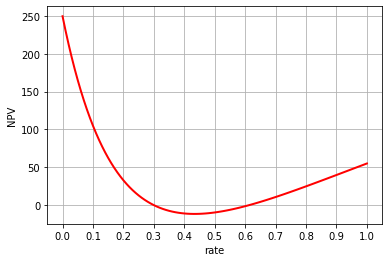

In [4]:
# Plot the graph
fig, ax = plt.subplots()
x = np.linspace(0, 1, 101)
ax.plot(x, [NPV(rate) for rate in x], 'r', lw=2)
ax.set_xlabel("rate")
ax.set_xticks(np.linspace(0,1,11))
ax.set_ylabel("NPV")
ax.grid()
plt.show()